<a href="https://colab.research.google.com/github/ThomasDarrieumerlou/Forecasting-project/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('merged_dataset.csv')
atlanta_data = df[df['City, State'] == 'Atlanta, GA']

# Afficher les données liées à Atlanta
atlanta_data.head(10)

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
0,1975.0,41.0800,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0
8,1976.0,40.7425,"Atlanta, GA",457300.0,7529.0,154.0,477.0,3518.0,3380.0
58,1977.0,42.4825,"Atlanta, GA",440300.0,7595.0,138.0,510.0,3593.0,3354.0
138,1978.0,45.8975,"Atlanta, GA",456000.0,8845.0,144.0,592.0,3990.0,4119.0
224,1979.0,50.8400,"Atlanta, GA",423103.0,10715.0,231.0,656.0,4639.0,5189.0
312,1980.0,56.9425,"Atlanta, GA",422474.0,11075.0,201.0,671.0,5470.0,4733.0
400,1981.0,61.1125,"Atlanta, GA",435626.0,10608.0,181.0,644.0,5246.0,4537.0
488,1982.0,64.9325,"Atlanta, GA",441103.0,10486.0,152.0,613.0,5722.0,3999.0
576,1983.0,67.5475,"Atlanta, GA",448635.0,9326.0,141.0,619.0,5014.0,3552.0
664,1984.0,71.6575,"Atlanta, GA",442951.0,10525.0,135.0,632.0,5729.0,4029.0


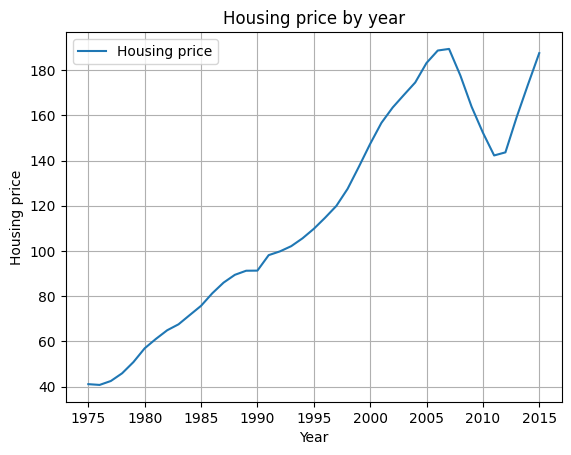

In [ ]:
atlanta_data.plot(x='Year', y='index_nsa', label='Housing price')

plt.title('Housing price by year')
plt.xlabel('Year')
plt.ylabel('Housing price')
plt.legend()
plt.grid()
plt.show()

In [70]:
ad_fuller_result = adfuller(atlanta_data['index_nsa'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.575933257874712
p-value: 0.9977835468996378


In [71]:
index_diff = np.diff(atlanta_data['index_nsa'], n=1)

ad_fuller_result = adfuller(index_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.5958732220236365
p-value: 0.00584041476850811


In [72]:
index_diff2 = np.diff(index_diff, n=1)

ad_fuller_result = adfuller(index_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.2651968960700914
p-value: 0.0005100643153057467


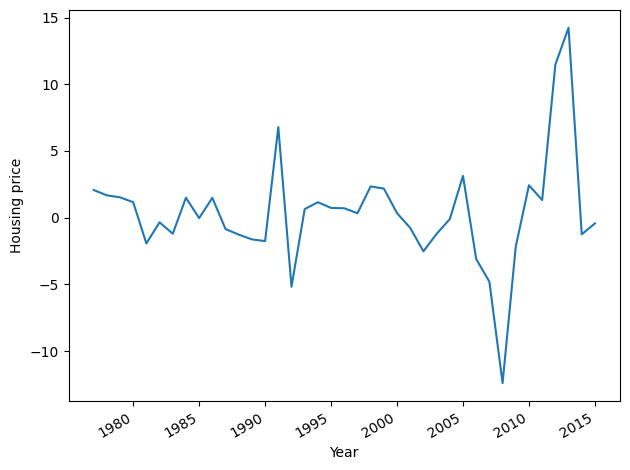

In [73]:
fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'][2:], index_diff2)
ax.set_xlabel('Year')
ax.set_ylabel('Housing price')

fig.autofmt_xdate()
plt.tight_layout()